# Lab for data manipulation
Required packages:

- `pandas`
- `seaborn`

The lab is organized using standard data processing pipeline:
1. Retrieve/load dataset(s);
2. Perform preprocessing and filtering;
3. Compute statistical estimators;
4. Plot the data.


For this lab, two datasets are available:
- `data/romeo_juliet_character.csv`: contains for each line who is the player and their gender.
- `data/romeo_juliet_line.csv`: contains for each line the content.

Their common information to match them together is the column `line_index`.

In [150]:
import pandas as pd

## Loading datasets

Pandas is able to load data from a wide range of format:
- From RAM using dictionaries
- From CSV files using `read_csv`
- From XML files using `read_xml`
- From HTML files using `read_html`
...

In [151]:

# Load data from CSV
df = pd.read_csv("data/shakespeare.csv")

# Load data from RAM
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1", "index_2", "index_3"])


**Exercice**: Load the two datasets in `data/romeo_juliet_character.csv` and in `data/romeo_juliet_line.csv` and store them in the variable `character` and `line`.

In [152]:
# load the two datasets
character = pd.read_csv("data/romeo_juliet_character.csv")
line = pd.read_csv("data/romeo_juliet_line.csv")

## Basic dataset information

After the initial loading process, several information can be computed on the dataset:
- Its size, using the attribute `.shape`
- Its columns, using the attributes `.columns`
- Its first rows, using the method `.head()`

In [153]:
# Example on demo dataframe
df.shape
df.columns
df.head()

,column_1,column_2,column_3
index_1,1,2,value_1
index_2,2,3,value_2
index_3,3,1,value_2


**Exercice**:
1. For each of the two Romeo and Juliet Dataframe, give their number of lines and columns.
2. For each of the two Romeo and Juliet Dataframe, give their column names.
3. For each of the two Romeo and Juliet Dataframe, obtain the `head()` of the dataframe and describe each column.

In [176]:
print(f"number of lines for character: {character.shape[0]}")
print(f"number of columns for character: {character.shape[1]}")

print(f"number of lines for line: {line.shape[0]}")
print(f"number of columns for line: {line.shape[1]}")

number of lines for character 3096
number of columns for character 3
number of lines for line 3096
number of columns for line 3


In [177]:

print(f"columns names for character: {character.columns}")

print(f"columns names for line: {line.columns}")

columns names for character Index(['line_index', 'Player', 'gender'], dtype='object')
columns names for line Index(['Unnamed: 0', 'PlayerLine', 'line_index'], dtype='object')


In [179]:

print(f"character \n {character.head()}")

print(f"line \n {line.head()}")

character 
    line_index    Player gender
0           1  RICHMOND   Male
1           2  RICHMOND   Male
2           3  RICHMOND   Male
3           4  RICHMOND   Male
4           5  RICHMOND   Male
line 
    Unnamed: 0                                    PlayerLine  line_index
0           0        Two households, both alike in dignity,           1
1           1       In fair Verona, where we lay our scene,           2
2           2      From ancient grudge break to new mutiny,           3
3           3  Where civil blood makes civil hands unclean.           4
4           4  From forth the fatal loins of these two foes           5


## Merging the two datasets

Often, information is scattered across several dataframes, and one must merge together several datasets to create a single one with the whole information (*see lecture slides on this topic*).

Pandas using the function `pd.merge()` to merge together two dataframes, where you must specify:
- The two dataframes to merge;
- The merge columns as the name of the columns in the  `left_on` (first daframe) and the `right_on` parameters (second dataframe);
- The merge approach using the `how` parameters (left, right, inner, outer) (*see lecture slides*).

In [155]:
# Example merge
df_1 = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]})
df_2 = pd.DataFrame({"column_4": [1, 2, 3], "column_5": [2, 5, 1]})

df = pd.merge(df_1, df_2, how="inner", left_on="column_1", right_on="column_4")

df.head()

,column_1,column_2,column_3,column_4,column_5
0,1,2,value_1,1,2
1,2,3,value_2,2,5
2,3,1,value_2,3,1


**Exercice**: Create a DataFrame `romeo_juliet` that merges the two dataframes in an inner fashion, both on their column `line_index`. List the columns of this new dataset.

In [156]:
romeo_juliet = pd.merge(character, line, how="inner", left_on="line_index", right_on="line_index")
print(f"columns names for df_romeo_juliet {romeo_juliet.columns}")

columns names for df_romeo_juliet Index(['line_index', 'Player', 'gender', 'Unnamed: 0', 'PlayerLine'], dtype='object')


## Filtering the dataset
Another important feature of pandas is the possibility of filtering the dataset in order to only work with the wanted individuals and variables.

In [157]:
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1","index_2","index_3"])

#### Accessing rows

In [158]:
# First row by index range
df.iloc[0:2]
# Also first row by index name
df.loc["index_1"]

column_1          1
column_2          2
column_3    value_1
Name: index_1, dtype: object

**Exercice**: Return the rows between line 20 and 40 of the `romeo_juliet` DataFrame you created in the previous question.

In [159]:
romeo_juliet.loc[20:40]

,line_index,Player,gender,Unnamed: 0,PlayerLine
20,21,GREGORY,Male,20,But thou art not quickly moved to strike.
21,22,SAMPSON,Male,21,A dog of the house of Montague moves me.
22,23,GREGORY,Male,22,"To move is to stir, and to be valiant is to st..."
23,24,GREGORY,Male,23,"therefore, if thou art moved, thou runn'st away."
24,25,SAMPSON,Male,24,A dog of that house shall move me to stand: I ...
25,26,SAMPSON,Male,25,take the wall of any man or maid of Montague's.
26,27,GREGORY,Male,26,"That shows thee a weak slave, for the weakest ..."
27,28,GREGORY,Male,27,to the wall.
28,29,SAMPSON,Male,28,"True, and therefore women, being the weaker ve..."
29,30,SAMPSON,Male,29,are ever thrust to the wall: therefore I will ...


#### Accessing columns

In [160]:
# Access as a series 
df["column_1"]
# or
df.column_1

# Access several columns at the same time
df[["column_1", "column_2"]]

# Access using both rows and column index
print(df.loc["index_1", 'column_1'])

1


In [161]:
#df = pd.read_csv("data/shakespeare.csv")

**Exercice**: Return the columns Player and PlayerLine from the `romeo_juliet` dataset.

In [162]:
romeo_juliet[["Player", "PlayerLine"]]

,Player,PlayerLine
0,RICHMOND,"Two households, both alike in dignity,"
1,RICHMOND,"In fair Verona, where we lay our scene,"
2,RICHMOND,"From ancient grudge break to new mutiny,"
3,RICHMOND,Where civil blood makes civil hands unclean.
4,RICHMOND,From forth the fatal loins of these two foes
...,...,...
3091,PRINCE,"The sun, for sorrow, will not show his head:"
3092,PRINCE,"Go hence, to have more talk of these sad things,"
3093,PRINCE,"Some shall be pardon'd, and some punished:"
3094,PRINCE,For never was a story of more woe


#### Filtering data on conditions

Boolean conditions can be applied to filter out different rows.
The return results is a DataFrame for which you can manipulate the same attributes and methods than other DataFrames.

In [163]:
# Filter on a specific column
df.column_1[df.column_1 > 1]

# Filter on the dataframe
df[df.column_3 == "value_1"]

# Group conditions
df.column_1[(df.column_1 > 1) & (2 > df.column_2)]

index_3    3
Name: column_1, dtype: int64

### Sorting data

Data can be sorted using the `sort_values()` method, which takes as argument in `by` the name of the column for sorting and the boolean value for `ascending`.

In [164]:

df.sort_values(by="column_1", ascending=True)

,column_1,column_2,column_3
index_1,1,2,value_1
index_2,2,3,value_2
index_3,3,1,value_2


**Exercice**:
1. Give the number of lines performed by a male and by a female actor.
2. Return all lines with an index above 50.
3. Sort dataset alphabetically by character's name.
4. Return all lines said by Juliet.
4. **Bonus**: return all the name of actor names that start with an R.

In [165]:
n_male = romeo_juliet.gender[romeo_juliet.gender == "Male"].shape[0]
n_male = romeo_juliet.gender[romeo_juliet.gender == "Male"].count()
n_female = romeo_juliet.gender[romeo_juliet.gender == "Female"].shape[0]
print(f"line count for male : {n_male}")
print(f"line count for female : {n_female}")


line count for male : 2037
line count for female : 943


In [166]:

romeo_juliet[romeo_juliet.line_index>50]


,line_index,Player,gender,Unnamed: 0,PlayerLine
50,51,GREGORY,Male,50,"I will frown as I pass by, and let them take i..."
51,52,GREGORY,Male,51,they list.
52,53,SAMPSON,Male,52,"Nay, as they dare. I will bite my thumb at them,"
53,54,SAMPSON,Male,53,"which is a disgrace to them, if they bear it."
54,55,ABRAHAM,Male,54,"Do you bite your thumb at us, sir?"
...,...,...,...,...,...
3091,3092,PRINCE,Male,3091,"The sun, for sorrow, will not show his head:"
3092,3093,PRINCE,Male,3092,"Go hence, to have more talk of these sad things,"
3093,3094,PRINCE,Male,3093,"Some shall be pardon'd, and some punished:"
3094,3095,PRINCE,Male,3094,For never was a story of more woe


In [167]:

romeo_juliet.sort_values(by="Player")


,line_index,Player,gender,Unnamed: 0,PlayerLine
69,70,ABRAHAM,Male,69,You lie.
65,66,ABRAHAM,Male,65,No better.
63,64,ABRAHAM,Male,63,"Quarrel sir! no, sir."
56,57,ABRAHAM,Male,56,"Do you bite your thumb at us, sir?"
54,55,ABRAHAM,Male,54,"Do you bite your thumb at us, sir?"
...,...,...,...,...,...
1465,1466,TYBALT,Male,1465,will give me occasion.
2646,2647,Third Musician,Undetermined,2646,"Faith, I know not what to say."
2967,2968,Third Watchman,Undetermined,2967,"Here is a friar, that trembles, sighs and weeps:"
2968,2969,Third Watchman,Undetermined,2968,"We took this mattock and this spade from him,"


In [168]:

romeo_juliet[romeo_juliet.Player == "JULIET"]


,line_index,Player,gender,Unnamed: 0,PlayerLine
360,361,JULIET,Female,360,How now! who calls?
362,363,JULIET,Female,362,"Madam, I am here."
363,364,JULIET,Female,363,What is your will?
417,418,JULIET,Female,417,"And stint thou too, I pray thee, nurse, say I."
425,426,JULIET,Female,425,It is an honour that I dream not of.
...,...,...,...,...,...
2948,2949,JULIET,Female,2948,To make die with a restorative.
2949,2950,JULIET,Female,2949,Thy lips are warm.
2951,2952,JULIET,Female,2951,"Yea, noise? then I'll be brief. O happy dagger!"
2952,2953,JULIET,Female,2952,"This is thy sheath,"


In [173]:
romeo_juliet[romeo_juliet.Player.str[0] == 'R']

,line_index,Player,gender,Unnamed: 0,PlayerLine
0,1,RICHMOND,Male,0,"Two households, both alike in dignity,"
1,2,RICHMOND,Male,1,"In fair Verona, where we lay our scene,"
2,3,RICHMOND,Male,2,"From ancient grudge break to new mutiny,"
3,4,RICHMOND,Male,3,Where civil blood makes civil hands unclean.
4,5,RICHMOND,Male,4,From forth the fatal loins of these two foes
...,...,...,...,...,...
2892,2893,ROMEO,Male,2892,"Thou desperate pilot, now at once run on"
2893,2894,ROMEO,Male,2893,The dashing rocks thy sea-sick weary bark!
2894,2895,ROMEO,Male,2894,Here's to my love!
2895,2896,ROMEO,Male,2895,O true apothecary!


## Computing statistical estimators

After data preprocessing, computing statistical estimators is one of the final goal of data science.
As we saw in the lecture this morning, analysis can be either univariate or multivariate.

##### Univariate analysis

In [174]:
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1","index_2","index_3"])

The method `describe` provides all standard estimators (on **quantitative** data), which can also be computed separately using the corresponding method.

In [175]:
df.describe()

,column_1,column_2
count,3.0,3.0
mean,2.0,2.0
std,1.0,1.0
min,1.0,1.0
25%,1.5,1.5
50%,2.0,2.0
75%,2.5,2.5
max,3.0,3.0


For **categorical** data, you should use `value_counts` to compute the different numbers of time a value is present in the dataset. You calso use the `unique()` method to return an array of unique values within the dataframe.

In [138]:
df.column_3.value_counts()
df.column_3.unique()

array(['value_1', 'value_2'], dtype=object)

#### Multivariate analysis

Multivariate analysis consists in studying the relationship between several variables of the dataset. 

In the case of 1 categorical and 1 numerical variable, this analysis can be performed using the groupby method `groupby()`, that takes as input the name of the grouping variable, followed by the call of the method corresponding to the wanted estimator for the grouping.

In [139]:
df.groupby("column_3").mean()

,column_1,column_2
column_3,,
value_1,1.0,2.0
value_2,2.5,2.0


**Exercice**:
1. Give the name of distinct characters.
2. Count the number of lines by each character and return the character with the most line (method to computer the counts is `count()`).
3. Count the number of lines given by each gender.

In [185]:
print(f"here is the list of unique characters : \n {romeo_juliet.Player.unique()}\n\n")

here is the list of unique characters : 
 ['RICHMOND' 'SAMPSON' 'GREGORY' 'ABRAHAM' 'BENVOLIO' 'TYBALT'
 'First Citizen' 'CAPULET' 'LADY CAPULET' 'MONTAGUE' 'LADY MONTAGUE'
 'PRINCE' 'ROMEO' 'PARIS' 'Servant' 'Nurse' 'JULIET' 'MERCUTIO'
 'First Servant' 'Second Servant' 'Second Capulet' 'Chorus'
 'FRIAR LAURENCE' 'PETER' 'NURSE' 'LADY  CAPULET' 'First Musician'
 'Second Musician' 'Musician' 'Third Musician' 'BALTHASAR' 'Apothecary'
 'FRIAR JOHN' 'PAGE' 'First Watchman' 'Second Watchman' 'Third Watchman']




In [184]:
print(f"number of lines by each character : \n {romeo_juliet.groupby('Player').count()['PlayerLine']}\n\n")

number of lines by each character : 
 Player
ABRAHAM              5
Apothecary           7
BALTHASAR           32
BENVOLIO           160
CAPULET            273
Chorus              14
FRIAR JOHN          13
FRIAR LAURENCE     351
First Citizen        7
First Musician       9
First Servant       10
First Watchman      19
GREGORY             20
JULIET             544
LADY  CAPULET        2
LADY CAPULET       113
LADY MONTAGUE        3
MERCUTIO           261
MONTAGUE            41
Musician             1
NURSE                9
Nurse              272
PAGE                 9
PARIS               70
PETER               33
PRINCE              76
RICHMOND            15
ROMEO              613
SAMPSON             31
Second Capulet       3
Second Musician      4
Second Servant      12
Second Watchman      1
Servant             23
TYBALT              36
Third Musician       1
Third Watchman       3
Name: PlayerLine, dtype: int64




In [187]:

print(f"character with the most lines: \n{romeo_juliet.groupby('Player').count()['PlayerLine'].sort_values(ascending=False).head(1)}\n\n")

character with the most lines: 
Player
ROMEO    613
Name: PlayerLine, dtype: int64




In [189]:

print(f"number of line by gender: \n{romeo_juliet.groupby('gender').count()['PlayerLine']}\n\n")

number of line by gender: 
gender
Female           943
Male            2037
Undetermined     116
Name: PlayerLine, dtype: int64




## Plotting results

There are several libraries to perform plotting in Python, but we focus for this lab on the `seaborn` library. The standard Python library for plotting is `seaborn`, and seaborn is a wrapper around it that enables easy integration with pandas dataframe.

Most plots are integrated within the library, using the following syntax:
- x: Value of x axis;
- y: Value of y axis;
- hue: Color and grouping factor;
- data: pandas DataFrame.

In [141]:
import seaborn as sns

Count plots consist in counting the values for a given variable.

[Text(0, 0, 'value_1'), Text(1, 0, 'value_2'), Text(2, 0, '')]

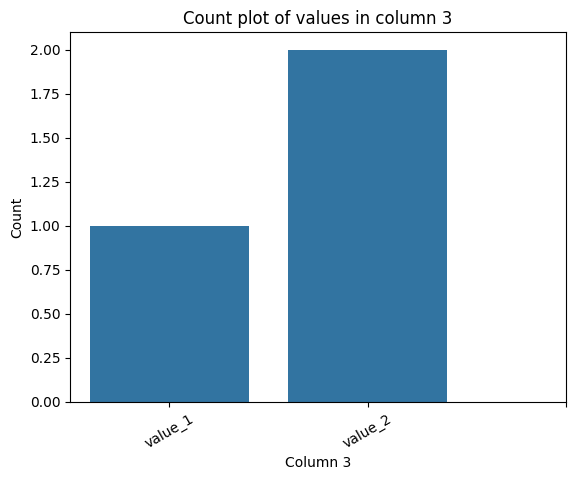

In [142]:
# Create a count plot with the proper x and y title
g = sns.countplot(x="column_3", data=df)
g.set_xlabel("Column 3")
g.set_ylabel("Count")
g.set_title("Count plot of values in column 3")

# Rotate x labels (is handy when you have a lot of x data)
g.set_xticks(range(len(df)))
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Text(0.5, 1.0, 'Scatter plot of column 1 and column 2')

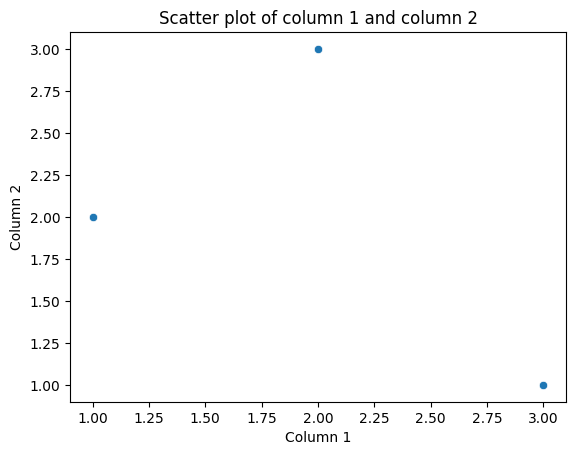

In [143]:


# Create a scatter plot
g = sns.scatterplot(x="column_1", y="column_2", data=df)
g.set_xlabel("Column 1")
g.set_ylabel("Column 2")
g.set_title("Scatter plot of column 1 and column 2")

**Exercice**:
1. Represent graphically the number of lines per gender. The x and y labels, as well the graph title, should be properly specified.
2. Represent graphically the number of lines per actor. The x and y labels, as well the graph title, should be properly specified.

[Text(0, 0, 'Male'), Text(1, 0, 'Undetermined'), Text(2, 0, 'Female')]

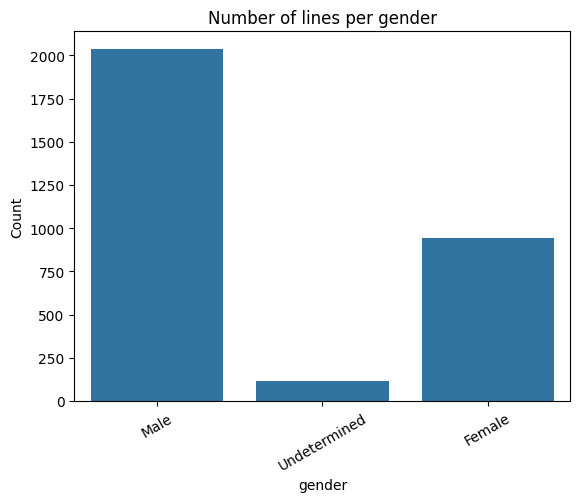

In [144]:
# Create a count plot with the proper x and y title
g = sns.countplot(x="gender", data=romeo_juliet)
g.set_xlabel("gender")
g.set_ylabel("Count")
g.set_title("Number of lines per gender")

# Rotate x labels (is handy when you have a lot of x data)

g.set_xticks(range(len(romeo_juliet["gender"].unique())))
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'RICHMOND'),
 Text(1, 0, 'SAMPSON'),
 Text(2, 0, 'GREGORY'),
 Text(3, 0, 'ABRAHAM'),
 Text(4, 0, 'BENVOLIO'),
 Text(5, 0, 'TYBALT'),
 Text(6, 0, 'First Citizen'),
 Text(7, 0, 'CAPULET'),
 Text(8, 0, 'LADY CAPULET'),
 Text(9, 0, 'MONTAGUE'),
 Text(10, 0, 'LADY MONTAGUE'),
 Text(11, 0, 'PRINCE'),
 Text(12, 0, 'ROMEO'),
 Text(13, 0, 'PARIS'),
 Text(14, 0, 'Servant'),
 Text(15, 0, 'Nurse'),
 Text(16, 0, 'JULIET'),
 Text(17, 0, 'MERCUTIO'),
 Text(18, 0, 'First Servant'),
 Text(19, 0, 'Second Servant'),
 Text(20, 0, 'Second Capulet'),
 Text(21, 0, 'Chorus'),
 Text(22, 0, 'FRIAR LAURENCE'),
 Text(23, 0, 'PETER'),
 Text(24, 0, 'NURSE'),
 Text(25, 0, 'LADY  CAPULET'),
 Text(26, 0, 'First Musician'),
 Text(27, 0, 'Second Musician'),
 Text(28, 0, 'Musician'),
 Text(29, 0, 'Third Musician'),
 Text(30, 0, 'BALTHASAR'),
 Text(31, 0, 'Apothecary'),
 Text(32, 0, 'FRIAR JOHN'),
 Text(33, 0, 'PAGE'),
 Text(34, 0, 'First Watchman'),
 Text(35, 0, 'Second Watchman'),
 Text(36, 0, 'Third Watchma

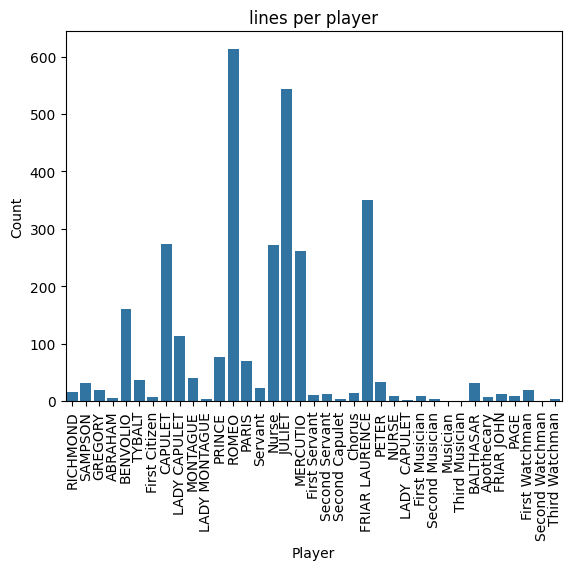

In [145]:
# Create a count plot with the proper x and y title
g = sns.countplot(x="Player", data=romeo_juliet)
g.set_xlabel("Player")
g.set_ylabel("Count")
g.set_title("lines per player")

# Rotate x labels (is handy when you have a lot of x data)
g.set_xticks(range(len(romeo_juliet["Player"].unique())))
g.set_xticklabels(g.get_xticklabels(), rotation=90)


**Bonus exercice**:
If you have finished all the previous exercises :-)

1. Extract all verses that contain the word "love".
2. Extract all verses said by Juliet that contains the word love.
3. Perform the following chronological plot: plot the number of words per line, use different colors of dots for the different genders
4. Perform the following chronological plot: plot every said line as a dot in blue, except if it contains the word love.

In [146]:
romeo_juliet[romeo_juliet.PlayerLine.str.contains("love")]

,line_index,Player,gender,Unnamed: 0,PlayerLine
5,6,RICHMOND,Male,5,"A pair of star-cross'd lovers take their life,"
8,9,RICHMOND,Male,8,"The fearful passage of their death-mark'd love,"
173,174,BENVOLIO,Male,173,In love?
175,176,BENVOLIO,Male,175,Of love?
176,177,ROMEO,Male,176,"Out of her favour, where I am in love."
...,...,...,...,...,...
2894,2895,ROMEO,Male,2894,Here's to my love!
2905,2906,BALTHASAR,Male,2905,One that you love.
2943,2944,JULIET,Female,2943,"What's here? a cup, closed in my true love's h..."
3071,3072,PRINCE,Male,3071,"Their course of love, the tidings of her death:"


In [147]:
romeo_juliet[(romeo_juliet.PlayerLine.str.contains("love")) & (romeo_juliet.Player=="JULIET")]

,line_index,Player,gender,Unnamed: 0,PlayerLine
731,732,JULIET,Female,731,My only love sprung from my only hate!
733,734,JULIET,Female,733,"Prodigious birth of love it is to me,"
734,735,JULIET,Female,734,That I must love a loathed enemy.
835,836,JULIET,Female,835,"Or, if thou wilt not, be but sworn my love,"
892,893,JULIET,Female,892,"Dost thou love me? I know thou wilt say 'Ay,'"
894,895,JULIET,Female,894,"Thou mayst prove false, at lovers' perjuries"
896,897,JULIET,Female,896,"If thou dost love, pronounce it faithfully:"
906,907,JULIET,Female,906,"My true love's passion: therefore pardon me,"
907,908,JULIET,Female,907,"And not impute this yielding to light love,"
913,914,JULIET,Female,913,Lest that thy love prove likewise variable.


Text(0.5, 1.0, 'nb of words over time')

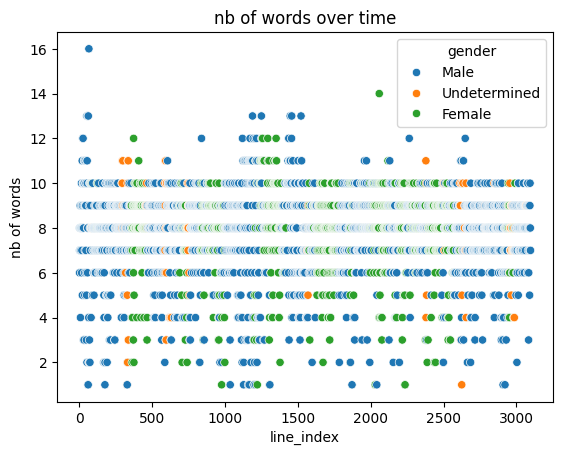

In [149]:

def count_words(PlayerLine):
    return len(PlayerLine.split(" "))

nb_words_per_line = romeo_juliet["PlayerLine"].apply(count_words)
romeo_juliet = romeo_juliet.assign(nb_words=nb_words_per_line)
romeo_juliet.head()

# Create a scatter plot
g = sns.scatterplot(x="line_index", y="nb_words", data=romeo_juliet, hue="gender")
g.set_xlabel("line_index")
g.set_ylabel("nb of words")
g.set_title("nb of words over time")
#g.set_yticks(range(20))